# Logistic Regression
 
1. Notebooks:
   - [prashant's](https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial)
   - [Fares](https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch)
2. StatQuest:
   - [over all idea](https://youtu.be/yIYKR4sgzI8?si=cXcs2zsUc4iUjGsX)
   - [detailed p1](https://youtu.be/vN5cNN2-HWE?si=m5hBoHzLTd21VRfm)
   - [detailed p2](https://youtu.be/BfKanl1aSG0?si=zYxd9SiGS9Vmxnrk)
   - [hidden StatQuest indexing](https://statquest.org/video-index/)

# parshant's -incomplete-

## Data Pre-Processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./data/uci-breast-cancer-wisconsin-original.zip
./data/weatherAUS.csv
./data/uci-breast-cancer-wisconsin-original\breast-cancer-wisconsin.data.txt


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./data/weatherAUS.csv')
df.shape, df.head()

((145460, 23),
          Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
 1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
 2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
 3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
 4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
 
   WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
 0           W           44.0          W  ...        71.0         22.0   
 1         WNW           44.0        NNW  ...        44.0         25.0   
 2         WSW           46.0          W  ...        38.0         30.0   
 3          NE           24.0         SE  ...        45.0         16.0   
 4           W           41.0        ENE  ...        82.0         33.0   
 
    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  R

In [5]:
#in the doc => rmv RISK_MM
df.columns
#df.drop(['RISK_MM'], axis=1, inplace=True) => the updated dataset removed it already*

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Categorical vars:

In [7]:
#finding categorical vars => dtype == O aka object
cat = [var for var in df.columns if df[var].dtype =='O']
print('There are {} categorical variables\n'.format(len(cat)))

print('The categorical variables are :', cat)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
df[cat].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Problems w Categorical vars:
1. missing values
2. Cardinality

#### 1. Missing val

In [9]:
df[cat].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
cat1 = [var for var in cat if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


In [11]:
#frequency of cat values
for var in cat:
    print(df[var].value_counts())

Date
2017-06-24    49
2017-06-23    49
2017-06-22    49
2017-06-21    49
2017-06-20    49
              ..
2008-01-27     1
2008-01-28     1
2008-01-29     1
2008-01-30     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarb

In [12]:
# distru of cat values
for var in cat:
    print(df[var].value_counts()/float(len(df)))
    #in the notebook he used np.float() => ain't in numpy anymore, use float() by itself

Date
2017-06-24    0.000337
2017-06-23    0.000337
2017-06-22    0.000337
2017-06-21    0.000337
2017-06-20    0.000337
                ...   
2008-01-27    0.000007
2008-01-28    0.000007
2008-01-29    0.000007
2008-01-30    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Adelaide            0.021951
Darwin              0.021951
Hobart              0.021951
Perth               0.021951
Melbourne           0.021951
Brisbane            0.021951
Albury              0.020899
MountGinini         0.020899
GoldCoast           0.020899
Wollongong          0.020899
MountGambier        0.020899
Launceston          0.020899
AliceSprings        0.020899
Albany              0.020899
Townsville          0.020899
Bendigo             0.020899
Cairns              0.020899
Ballarat            0.020899
Penrith             0.020892
Newcastle           0.020892
Tuggeranong         0.020892
PerthAirport        0.02

In [13]:
for var in cat:
    print(var, 'contains', len(df[var].unique()), 'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 3 labels


#### 2. Cardinality

##### 1. Date cardinality

In [14]:
print(df['Date'].dtype)
# parse obj => datetime string
df['Date'] = pd.to_datetime(df['Date'])

object


In [15]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [17]:
df.drop('Date', axis=1, inplace=True)

In [18]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [19]:
#again, explore cat vars
cat = [var for var in df.columns if df[var].dtype =='O']
print('There are {} categorical variables\n'.format(len(cat)))

print('The categorical variables are :', cat)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
#rechecking missing values
df[cat].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

##### 2. Location missing values

In [21]:
#explore each missing values cat
#1. location
print('location contains', len(df.Location.unique()), 'labels')
df.Location.unique()

location contains 49 labels


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [22]:
#freq distru
df.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarbour        3009
NorfolkIsland       3009
WaggaWagga          3009
Witchcliffe         3009
Watsonia            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura         

In [23]:
# doing one hot encoding of location!
#setting k-1 dummy vars after 1 hot
location_dummies = pd.get_dummies(df.Location, drop_first=True).astype(int)
location_dummies.head()
#wo using astype => it out boolean values not binary!

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 3. WindGustDir Cardinality

In [24]:
print('windgustdir contains', len(df['WindGustDir'].unique()), 'labels')

windgustdir contains 17 labels


In [25]:
df['WindGustDir'].unique()
df.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [26]:
#again, one hot encoding.
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).astype(int).head()
#added dummy_na => represent the missing vals

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
#sum all 1s for each variable => observation/cat
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)
#10326 missing vals!

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

##### 4. WindDir9am => missing vals

In [29]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'label')

WindDir9am contains 17 label


In [31]:
df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [32]:
print(df['WindDir9am'].value_counts())

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64


In [33]:
#1hot encode
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).astype(int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#sum observa
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

##### 5. WindDir3pm => missing vals

In [37]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'label')

WindDir3pm contains 17 label


In [38]:
df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [39]:
print(df['WindDir3pm'].value_counts())

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64


In [40]:
#1hot encode
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).astype(int).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [41]:
#sum observa
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

##### 6. RainToday => missing vals

In [43]:
print('RainToday contains', len(df['RainToday'].unique()), 'label')

RainToday contains 3 label


In [46]:
df['RainToday'].unique(), df['RainToday'].value_counts()

(array(['No', 'Yes', nan], dtype=object),
 RainToday
 No     110319
 Yes     31880
 Name: count, dtype: int64)

In [47]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).astype(int).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [49]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

### Explore Numeric vals

In [51]:
numr = [var for var in df.columns if df[var].dtype!='O']
print("there are {} numeric values\n".format(len(numr)))
print("the numerical vars are:", numr)

there are 19 numeric values

the numerical vars are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [52]:
df[numr].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Problems with numerical vars
1. Missing values.
2. 

#### 1. Missing vals

In [55]:
df[numr].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

#### 2. Outliers in numerical variables

In [56]:
# summary statistics
print(round(df[numr].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'WindSpeed9am')

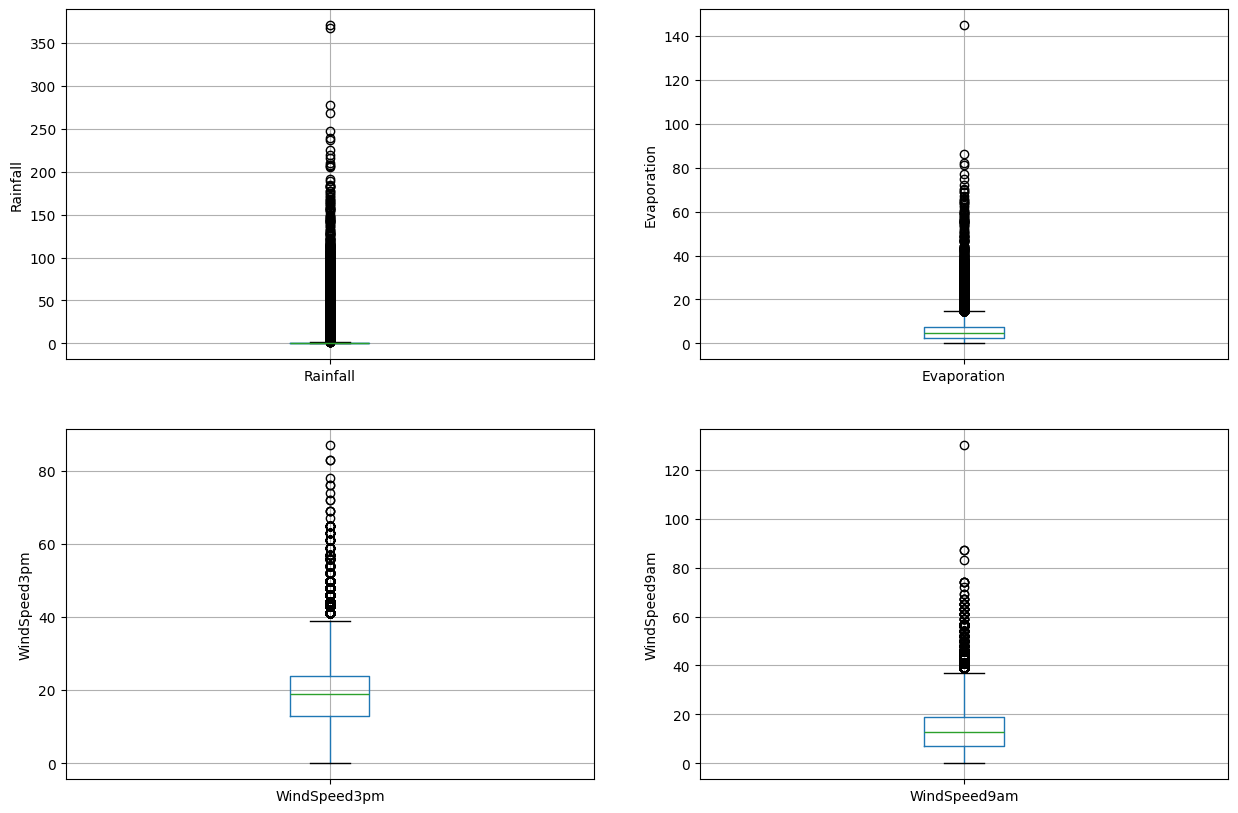

In [59]:
#draw boxplot
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2,2,2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2,2,3)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

plt.subplot(2,2,4)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')



#### 3. Distribution of vars
- skewed => IQR
- normal => extreme value analysis

Text(0, 0.5, 'RainTomorrow')

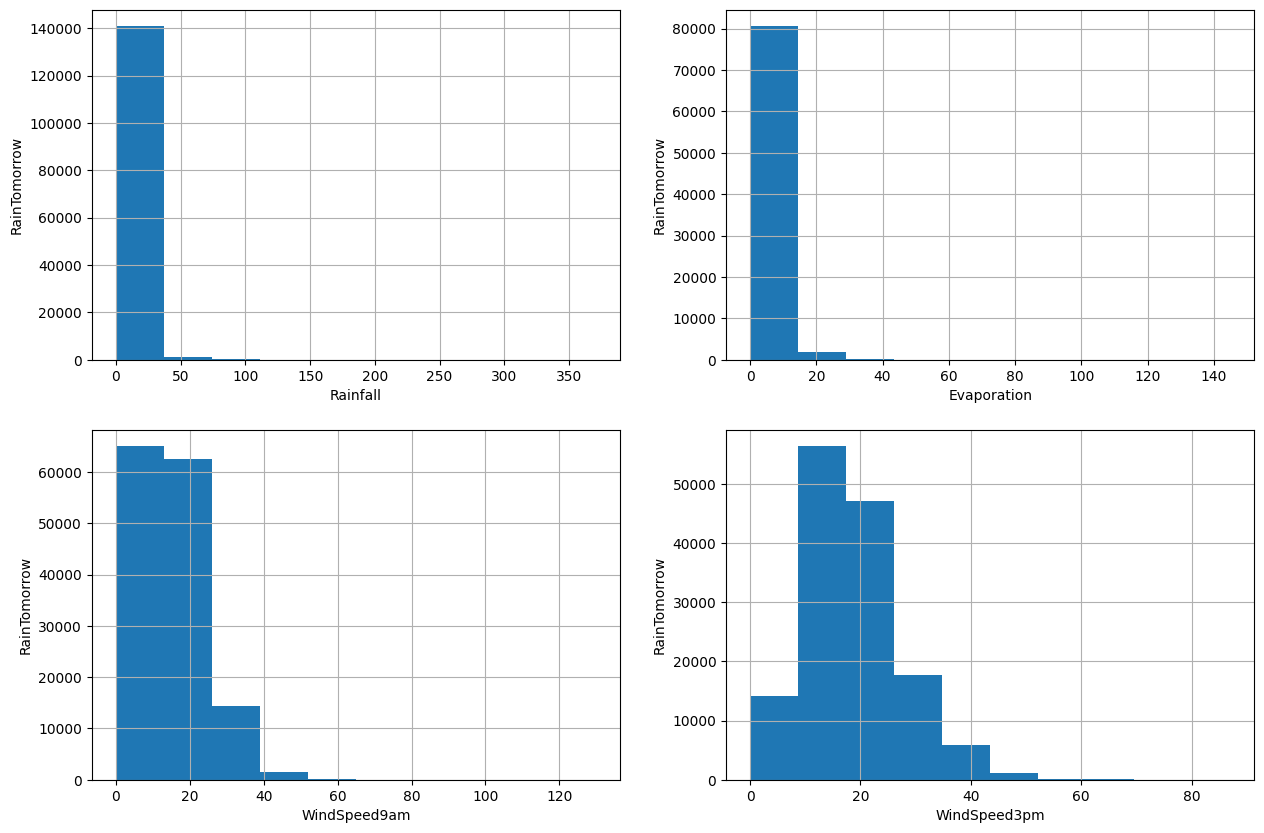

In [62]:
# plot histogram to check values:

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig= df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,2)
fig= df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,3)
fig= df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel("RainTomorrow")

plt.subplot(2,2,4)
fig= df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel("RainTomorrow")

In [ ]:
#finding outliers through IQR
# 1. Rainfall
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
lower_fence = df.Rainfall.quantile(0.25) - (IQR *3)
upper_fence = df.Rainfall.quantile(0.75) + (IQR *3)
print('rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

# 1. Evaporation
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
lower_fence = df.Evaporation.quantile(0.25) - (IQR *3)
upper_fence = df.Evaporation.quantile(0.75) + (IQR *3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

# 1. WindSpeed9am
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR *3)
upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR *3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

# 1. WindSpeed3pm
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR *3)
upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR *3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower_fence, upperboundary=upper_fence))

rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


## Actually starting with the model -finally-

### feature vec & splits

In [66]:
x = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### feature eng


In [74]:
cat = [col for col in x_train.columns if x_train[col].dtype == 'object']
numr = [col for col in x_train.columns if x_train[col].dtype != 'object']
cat, numr

(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'],
 ['MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'Year',
  'Month',
  'Day'])

In [ ]:
#1. missing vals in numeric
print("train missing vals:\n\n", x_train[numr].isnull().sum())
print("\n\ntest missing vals:\n\n", x_test[numr].isnull().sum())

train missing vals:

 MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Month                0
Day                  0
dtype: int64


test missing vals:

 MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Year                 0
Month                0
Day                  0
dtype: int64


In [82]:
#impute missing vals using median cuz it works with outliers
for df1 in [x_train, x_test]:
    for col in numr:
        col_median = x_train[col].median()
        df1[col].fillna(col_median, inplace=True)

print("train missing vals:\n\n", x_train[numr].isnull().sum())
print("\n\ntest missing vals:\n\n", x_test[numr].isnull().sum())

train missing vals:

 MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64


test missing vals:

 MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64


In [84]:
#2. missing vals in categor
print("train missing vals:\n\n", x_train[cat].isnull().mean())
print("\n\ntest missing vals:\n\n", x_test[cat].isnull().mean())

train missing vals:

 Location       0.000000
WindGustDir    0.071068
WindDir9am     0.072597
WindDir3pm     0.028951
RainToday      0.022489
dtype: float64


test missing vals:

 Location       0.000000
WindGustDir    0.070672
WindDir9am     0.072804
WindDir3pm     0.029527
RainToday      0.022137
dtype: float64


In [ ]:
#impute data
for df2 in [x_train, x_test]:
    df2['WindGustDir'].fillna(x_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(x_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(x_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(x_train['RainToday'].mode()[0], inplace=True)

In [87]:
print("train missing vals:\n\n", x_train[cat].isnull().sum())
print("\n\ntest missing vals:\n\n", x_test[cat].isnull().sum())

train missing vals:

 Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


test missing vals:

 Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


# Fares'

## Data

### Data vis 

In [44]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pip install plotly
import plotly.express as px
import pprint
import pickle

Note: you may need to restart the kernel to use updated packages.


In [45]:
df = pd.read_csv('./data/breast-cancer.csv')

In [46]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis', color_discrete_sequence=['#05445E','#75E6DA'])

In [48]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [49]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [50]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [51]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [52]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

### Data pre-process

In [53]:
df.drop('id', axis=1, inplace=True)

In [54]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)
#encoding labels 0/1

In [55]:
#get highly correlated features
corr = df.corr()

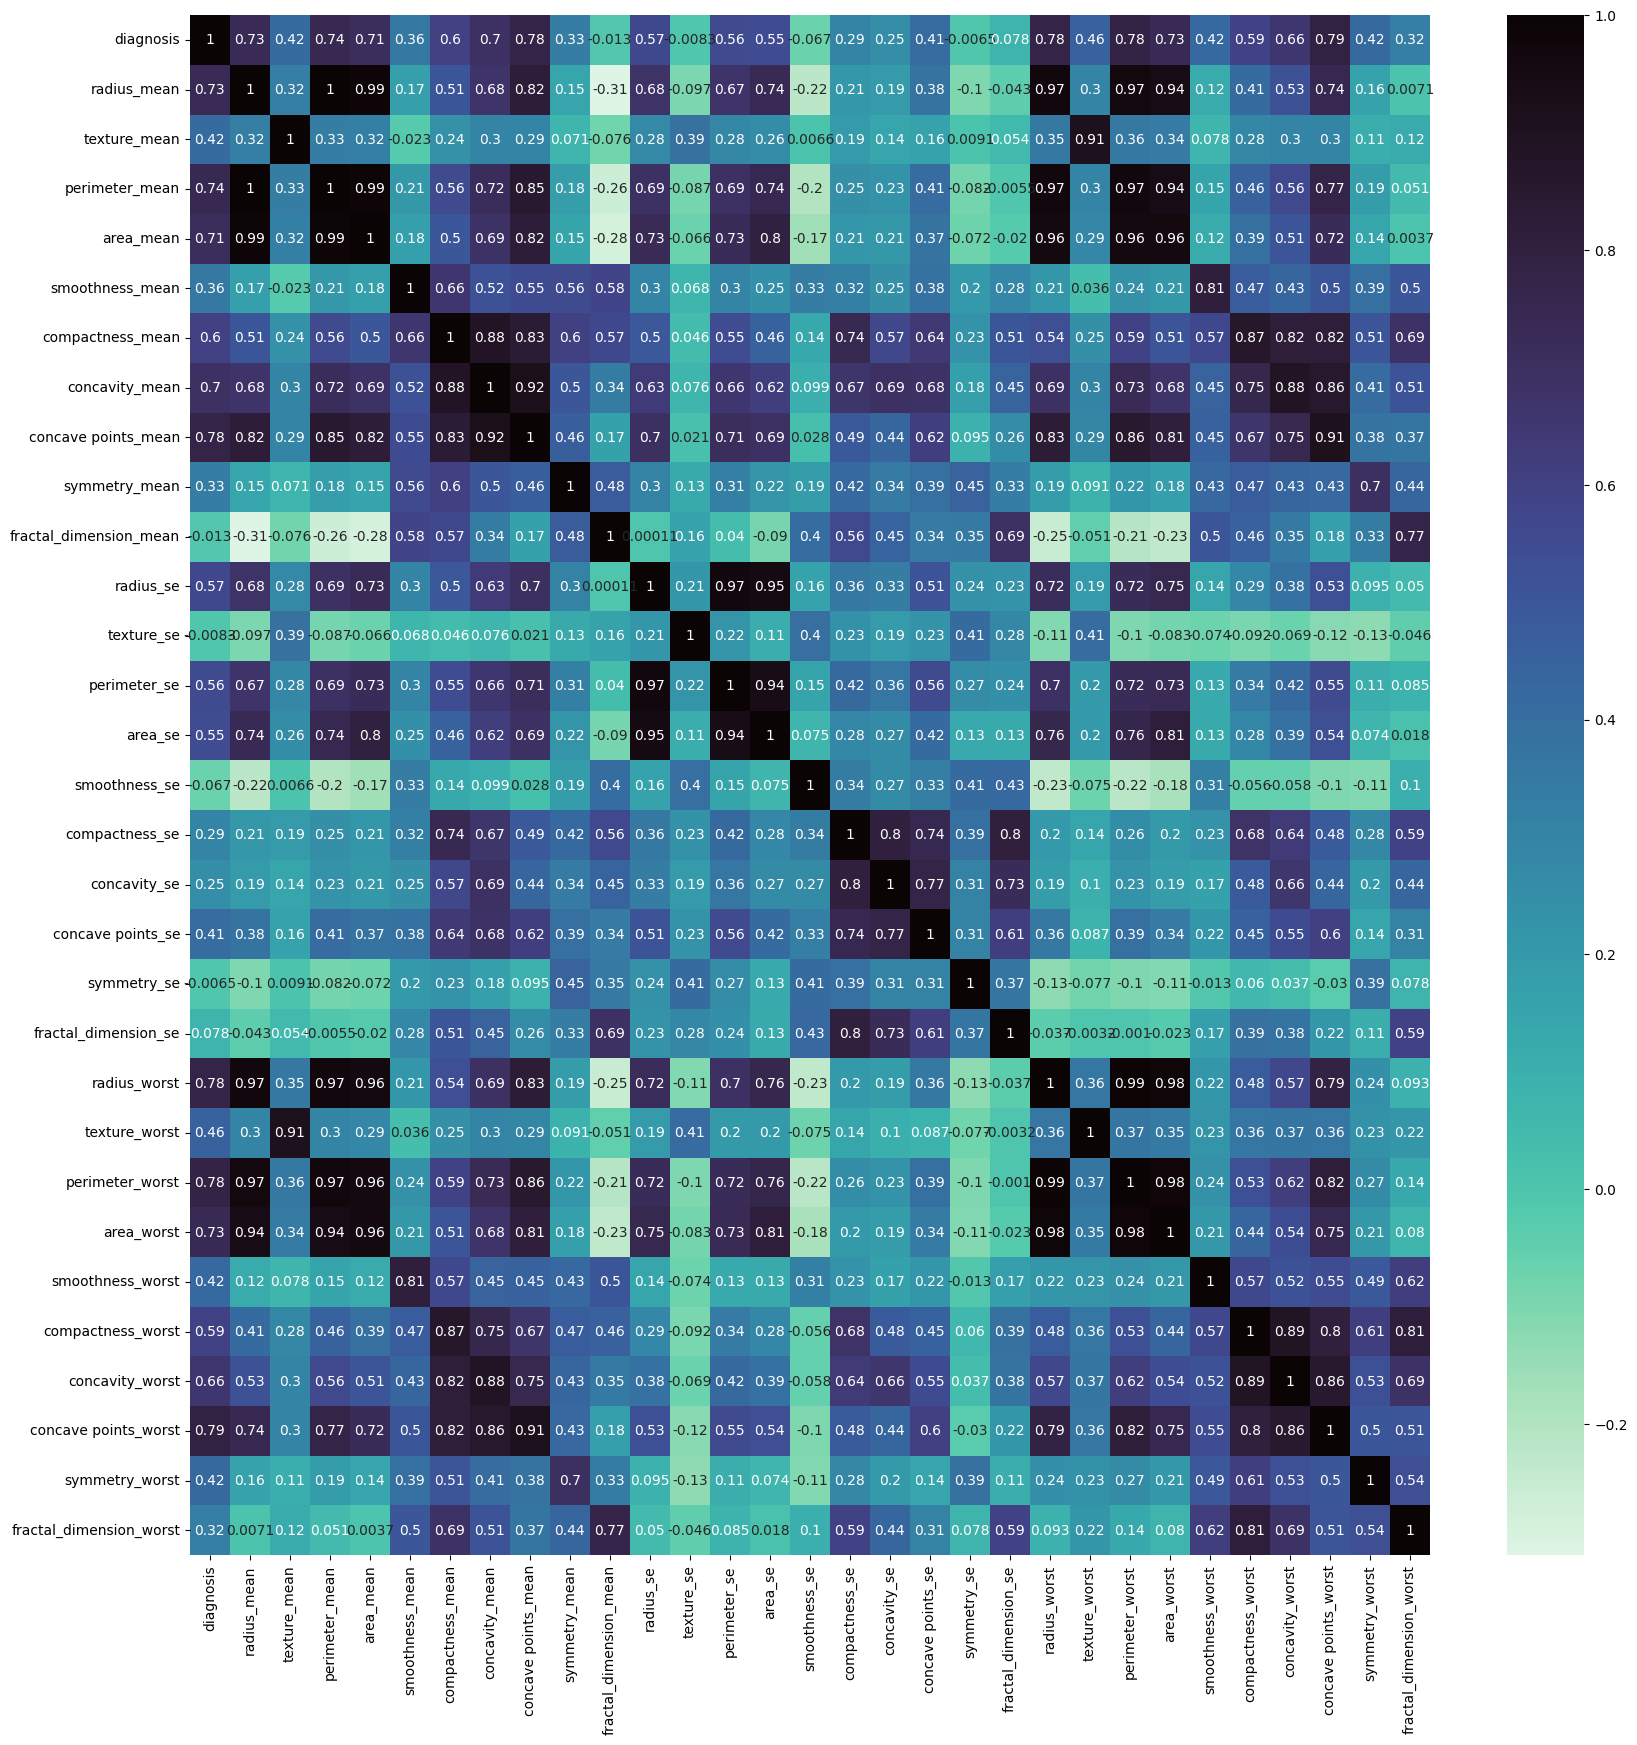

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r', annot=True)
plt.show()

In [57]:
cor_target = abs(corr['diagnosis'])
#select highly corr => threshold 0.2
rel_feat = cor_target[cor_target>0.2]
#collect their names
names = [idx for idx in rel_feat.index] #was rel_feat.iteritems() => ain't accessible in the loop, used index instead
#drop the target
names.remove('diagnosis')
pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


In [58]:
x = df[names].values
y = df['diagnosis'].values

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [60]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)
#instead of re-defining function from scratch, old method

In [61]:
#that didn't work, dunno why! 
def standardize_data(x_train, x_test):
    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    
    # Standardize the data
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std
    
    return x_train, x_test
x_train, x_test = standardize_data(x_train, x_test)

## Model implementation

In [62]:
def sigmoid(z):
    sigmoid_res = 1/(1+np.exp(-z))
    return sigmoid_res

In [71]:
class LogisticRegression:
    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.lr=learning_rate
    
    def init_param(self):
        self.W = np.zeros(self.x.shape[1])
        self.b = 0.0

    def forward(self, x):
        z = np.matmul(x, self.W) + self.b
        a = sigmoid(z)
        return a
    
    def compute_cost(self, predictions):
        m = self.x.shape[0] #num of trainning examples
        cost = np.sum((-np.log(predictions + 1e-8) * self.y) + (-np.log(1-predictions + 1e-8)) * (1-self.y))
        # adding 1e-8 => avoid log(0)
        return cost/m
    
    def compute_gradient(self, predictions):
        m = self.x.shape[0]

        self.dW = np.matmul(self.x.T, (predictions-self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])
        self.db = np.sum(np.subtract(predictions, self.y))

        #scale grad
        self.dW *= (1/m)
        self.db *= (1/m)

    def fit(self, x, y, iterations, plot_cost=True):
        self.x=x
        self.y=y
        self.init_param()

        costs=[]
        for i in range(iterations):
            predictions = self.forward(self.x)
            cost = self.compute_cost(predictions)
            costs.append(cost)
            self.compute_gradient(predictions)

            self.W = self.W - self.lr * self.dW
            self.b = self.b - self.lr * self.db

            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

        if plot_cost:
            fig = px.line(y=costs,title="Cost vs Iteration",template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9", 
                xaxis=dict(color="#41BEE9",title="Iterations"), 
                yaxis=dict(color="#41BEE9",title="cost")
            )
            fig.show()

    def predict(self, x):
        predictions = self.forward(x)
        return np.round(predictions)
    
    def save_model(self, filename=None):
        model_data = {
            'lr': self.lr,
            'W': self.W,
            'b': self.b
        }
        with open(filename, 'wb') as file:
            pickle.dump(model_data, file)

    @classmethod
    def load_model(cls, filename):
        with open(filename, 'rb') as file:
            model_data = pickle.load(file)
        
        #creating new instance
        loaded_model = cls(model_data['lr'])
        loaded_model.W = model_data['W']
        loaded_model.b = model_data['b']

        return loaded_model


In [72]:
lg = LogisticRegression()
lg.fit(x_train, y_train, 100000)

Cost after iteration 0: 0.6931471605599454
Cost after iteration 10000: 0.24563382078979018
Cost after iteration 20000: 0.18473740099968886
Cost after iteration 30000: 0.1570019184902219
Cost after iteration 40000: 0.14038352075048852
Cost after iteration 50000: 0.1291113072523735
Cost after iteration 60000: 0.12087920698976999
Cost after iteration 70000: 0.11455519557402054
Cost after iteration 80000: 0.10951308243466136
Cost after iteration 90000: 0.10537723432524856


In [73]:
lg.save_model('model.pk1')

## Evaluation

In [75]:
model = LogisticRegression.load_model('model.pk1')

In [76]:
class metrices:
    @staticmethod
    def acc(y_true, y_pred):
        y_true = y_true.flatten()
        samples = len(y_true)
        correct_pred = np.sum(y_true == y_pred)
        return (correct_pred / samples)
    
    @staticmethod
    def perc(y_true, y_pred):
        true_pos = np.sum((y_true == 1) & (y_pred == 1))
        false_pos = np.sum((y_true==0) & (y_pred == 1))
        return true_pos / (true_pos + false_pos)
    
    @staticmethod
    def recall(y_pred, y_true):
        true_pos = np.sum((y_true == 1) & (y_pred == 1))
        false_neg = np.sum((y_true == 1) & (y_pred == 0))
        return true_pos / (true_pos + false_neg)
    
    @staticmethod
    def f1_score(y_true, y_pred):
        pers = metrices.perc(y_true, y_pred)
        recall = metrices.recall(y_pred, y_true)
        return 2 * (pers/recall) / (pers + recall)

In [78]:
y_pred = model.predict(x_test)
accuracy = metrices.acc(y_test, y_pred)
percision = metrices.perc(y_test, y_pred)
recall = metrices.recall(y_pred, y_test)
f1 = metrices.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {percision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")

Accuracy: 95.80%
Precision: 98.04%
Recall: 90.91%
F1-Score: 114.15%
